# Frogs In A Pond 

Now that we know the basics (and a little more) about objects. Let's create a fun little toy world. This world will be a pond, with frogs in it.

In [1]:
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import random
from IPython import display
import time
%matplotlib inline

## The Frogs Class

First, let's create the `Frog` class. We will talk through all of the methods and properties in the lecture video.

In [2]:
class Frog():
    def __init__(self, name, x, y, random_factor):
        self.x = x
        self.y = y
        self.name = name
        self.movement_distance = 1
        self.random_factor = random_factor
    def move_up(self):
        '''Move the Frog Up!'''
        self.y += self.movement_distance + self._random_distance()
    def move_down(self):
        '''Move the Frog Down!'''
        self.y -= self.movement_distance + self._random_distance()
    def move_right(self):
        '''Move the Frog Right!'''
        self.x += self.movement_distance + self._random_distance()
    def move_left(self):
        '''Move the Frog Left!'''
        self.x -= self.movement_distance + self._random_distance()
    def random_move(self):
        '''Move the Frog In A Random Direction!'''
        rand_int = random.randint(1, 4)
        if rand_int == 1:
            self.move_up()
        elif rand_int == 2:
            self.move_down()
        elif rand_int == 3:
            self.move_left()
        elif rand_int == 4:
            self.move_right()
    def _random_distance(self):
        '''Generate a random distance.'''
        return (random.random()-0.5) * self.random_factor

## The Pond Class

Now, let's create the `Pond` class. It's important to note that the `Pond` object expects it will have "animal objects" that have a `random_move()` method and `x` and `y` properties.

In [3]:
class Pond():
    def __init__(self, animals, xlims, ylims):
        self._animals = animals
        self._xlims = xlims
        self._ylims = ylims
        
    def show_world(self):
        '''Plot the pond and plot the animals'''
        self._fig, self._ax = plt.subplots(1, 1, figsize=(14, 8))
        self._ax.set_xlim(*self._xlims)
        self._ax.set_ylim(*self._ylims)
        self._plot_animals()
    
    def _plot_animals(self):
        '''plot the animals in the pond figure'''
        for animal in self._animals:
            self._ax.plot(animal.x, animal.y, marker='o')
            self._ax.annotate(animal.name, (animal.x, animal.y))        
        
    def play_word(self, N):
        '''Evolve the world for N number of steps. Move each animal on every
        step, and update a plot on every step
        '''
        for _ in range(N):
            for animal in self._animals:
                animal.random_move()
                if animal.x > self._xlims[1]:
                    animal.x = self._xlims[1]
                elif animal.x < self._xlims[0]:
                    animal.x = self._xlims[0]
                if animal.y > self._ylims[1]:
                    animal.y = self._ylims[1]
                elif animal.y < self._ylims[0]:
                    animal.y = self._ylims[0]
                
            self._ax.clear()
            self._ax.set_xlim(*self._xlims)
            self._ax.set_ylim(*self._ylims)
            self._plot_animals()
            display.clear_output(wait=True)
            display.display(self._fig)
            time.sleep(1.0)

### Make Some Frogs

In [4]:
frog_a = Frog(name="Steve", x=1, y=2, random_factor=0.33)
frog_b = Frog(name="Julie", x=3, y=4, random_factor=0.01)
frog_c = Frog(name="Claudia", x=2, y=1, random_factor=0.7)

### Make A Pond And Add Some Frogs

In [5]:
pond = Pond(animals=[frog_a, frog_b, frog_c], xlims=(-10, 10), ylims=(-10, 10))

### Show The Pond

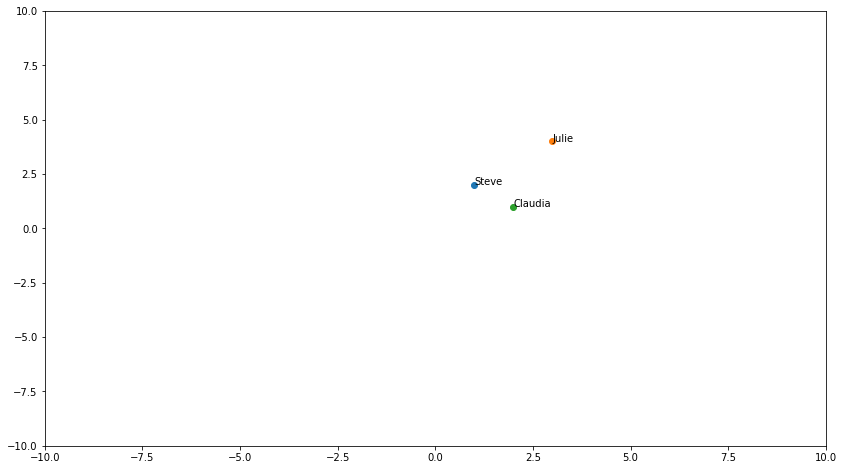

In [6]:
pond.show_world()

### Play The Pond

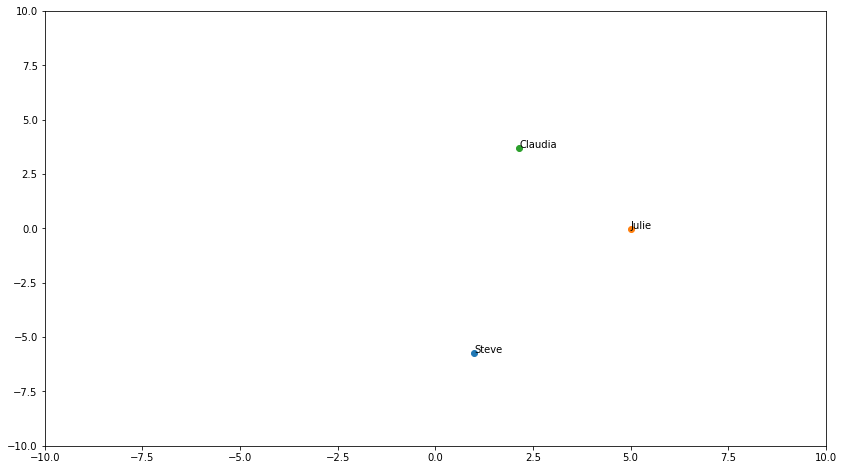

In [7]:
pond.play_word(10)

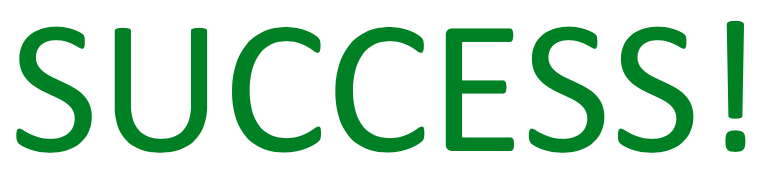